# Web Scraping and Data Analysis 
## --- Game of Thrones Ratings and # Votes on IMDB


* Reference: https://www.dataquest.io/blog/web-scraping-beautifulsoup/

### Scrape data from one episode in Season 1, to learn how Beautiful Soup works
#### 1, Get the html code from source page.

In [1]:
from requests import get
url = "https://www.imdb.com/title/tt0944947/episodes?season=1"
response = get(url)
print(response.text[:500])


 











<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///title/tt0944947?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
 


In [2]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

#### 2, get the blocks that contain information of each episode from the webpage

In [3]:
movie_containers = html_soup.find_all('div', class_ = ('list_item odd','list_item even'))
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
10


#### 3, Get one episode from the list of episodes

In [4]:
ep1 = movie_containers[0]

#### 4, Get Episode title

In [5]:
ep1.strong.text

'Winter Is Coming'

#### 5, Get star rating:

In [6]:
float(ep1.find('span', class_ = 'ipl-rating-star__rating').text)

9.1

#### 6, Get number of total votes:

In [7]:
vote=ep1.find('span', class_ = 'ipl-rating-star__total-votes').text

In [8]:
int(vote.replace('(', '').replace(')','').replace(',',''))

35640

### Integrating all the information:

In [9]:
titles = []
seasons = [i+1 for i in range(8)]
ratings = []
votes = []
ep_season = []

In [10]:
for season in seasons:
    url = "https://www.imdb.com/title/tt0944947/episodes?season="+str(season)
    response = get(url)
    html_soup = BeautifulSoup(response.text, 'html.parser')
    movie_containers = html_soup.find_all('div', class_ = ('list_item odd','list_item even'))
    for episode in movie_containers:
        # title
        title = episode.strong.text
        titles.append(title)
        # rating
        rating = float(episode.find('span', class_ = 'ipl-rating-star__rating').text)
        ratings.append(rating)
        # vote
        vote=episode.find('span', class_ = 'ipl-rating-star__total-votes').text
        vote=int(vote.replace('(', '').replace(')','').replace(',',''))
        votes.append(vote)
        # season
        ep_season.append(season)

### Data Analysis

In [11]:
import pandas as pd
df = pd.DataFrame({'Season': ep_season,
                  'Title': titles,
                   'Rating': ratings,
                   '# Votes': votes
                  })

In [12]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 4 columns):
# Votes    73 non-null int64
Rating     73 non-null float64
Season     73 non-null int64
Title      73 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 2.4+ KB
None


,# Votes,Rating,Season,Title
0,35640,9.1,1,Winter Is Coming
1,26992,8.8,1,The Kingsroad
2,25497,8.7,1,Lord Snow
3,24152,8.8,1,"Cripples, Bastards, and Broken Things"
4,25197,9.1,1,The Wolf and the Lion
5,24936,9.2,1,A Golden Crown
6,25445,9.3,1,You Win or You Die
7,23570,9.1,1,The Pointy End
8,33421,9.6,1,Baelor
9,29324,9.5,1,Fire and Blood


### Plot with GoT episode ratings and number of votes on IMDB, in one graph

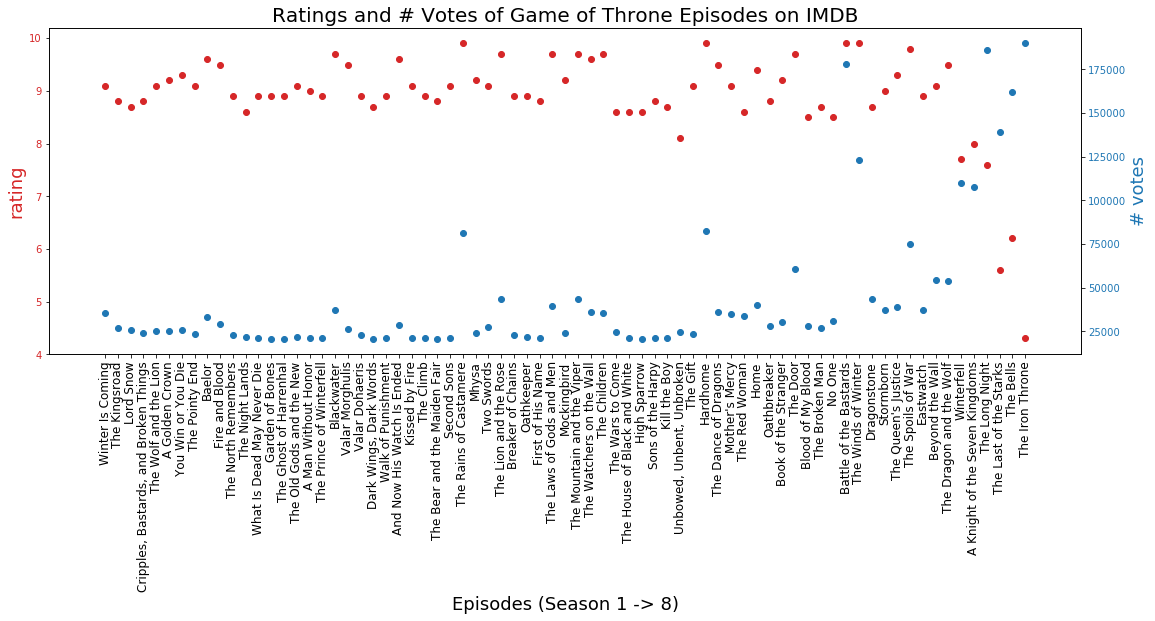

In [15]:
import numpy as np
import matplotlib.pyplot as plt
num_ep = [i+1 for i in range(df.shape[0])]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Episodes (Season 1 -> 8)', fontsize = 18)
ax1.set_ylabel('rating', color=color, fontsize=18)
plt.xticks(num_ep, titles, rotation=90, fontsize=12)
ax1.scatter(num_ep, ratings, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# votes', color=color, fontsize=18)  # we already handled the x-label with ax1
ax2.scatter(num_ep, votes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(18.5, 6)
plt.title('Ratings and # Votes of Game of Throne Episodes on IMDB', fontsize=20)
plt.show()

#### Comments of the graph:
* Red dots stand for episode ratings --- ratings have been generally high in earlier seasons, but plummeted in Season 8.
* Blue dots stand for number of votes for each episode --- Season 8 has attracted highest number of voters. 
* One can not make a simple conclusion that the more the voters, the lower the rating, because in earlier seasons the episodes with most voters are also the ones with highest ratings (e.g., the Rains of Castamere, Hardhome, Battle of the Bastards, the Winds of Winter)